#   EE 521 DSP Lab 

##  Assignment-3 | AVI KHANDELWAL, 204102301 

## Importing packages -

In [1]:
from numpy import sin,pi
import numpy as np
import matplotlib.pyplot as plt
import math as m
import warnings
import cmath
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import patches


warnings.filterwarnings('ignore')

# PART A: Z Transforms

### Q1 Consider the discrete time sequence x[n] = z^n with −∞ < n < ∞ where z ∈ C.. Let z = 0.95, z = 1.05, z = −1.05, z = −0.97, z = 1, z = −1. Now plot the sequences for different values of z. For each plot what is the nature of the plot?

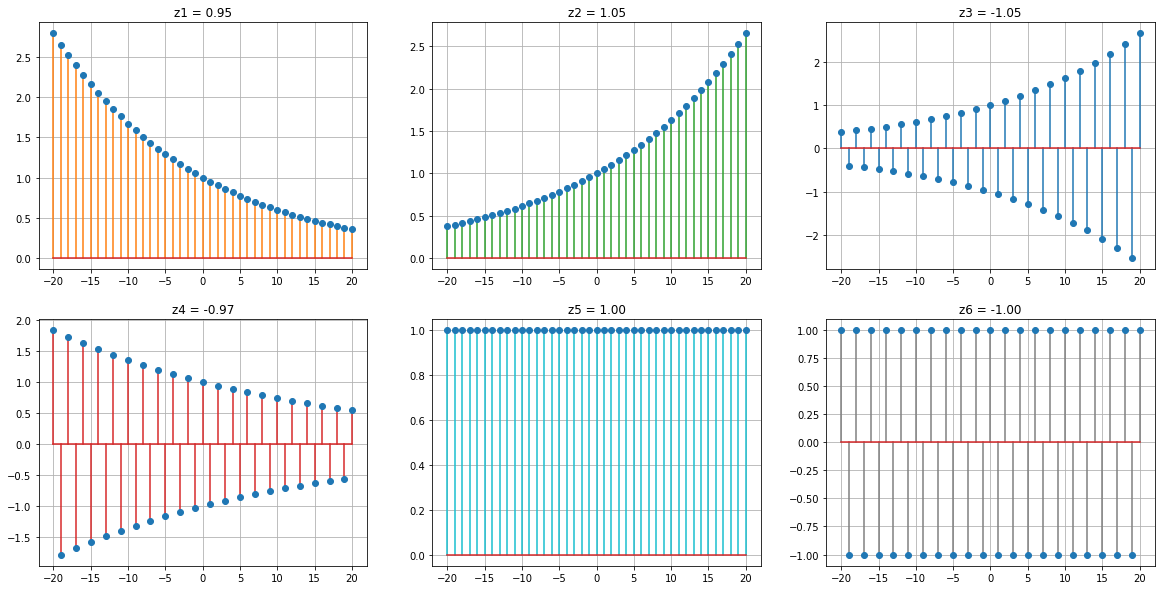

In [ ]:
z = np.array([0.95,1.05,-1.05,-0.97,1,-1])
n = np.arange(-20,21,1)
fig, axs = plt.subplots(2, 3,figsize=(20,10))
color = ['tab:orange','tab:green','tab:blue','tab:red','tab:cyan','tab:grey']
for i in range(6):
    x = z[i]**n
    axs[i//3, i%3].stem(n,x,color[i])
    axs[i//3, i%3].set_title("z%d = %0.2f"%((i+1),z[i]))
    axs[i//3, i%3].grid("on")

### From the above plots we can see that -
#### 1. For |z| < 1 , the plots look like falling exponential
#### 2. For |z| > 1, the plots look like rising exponential
#### 3. For |z| = 1, the plot is uniformly distributed
#### 4. Depending on the sign if z is positive, all samples are above x-axis and if z is negative, samples are both below and above x-axis

### Q2. Now consider the same sequence with complex values of z. Consider z = −2 + 3j, z = 2 − 3j, z = e^jπ/10, z = 0.95e^jπ/10, z = 1.05e^jπ/10. For these values of z create 3D plot with both real and imaginary parts. Try using different markers for real and imaginary parts.

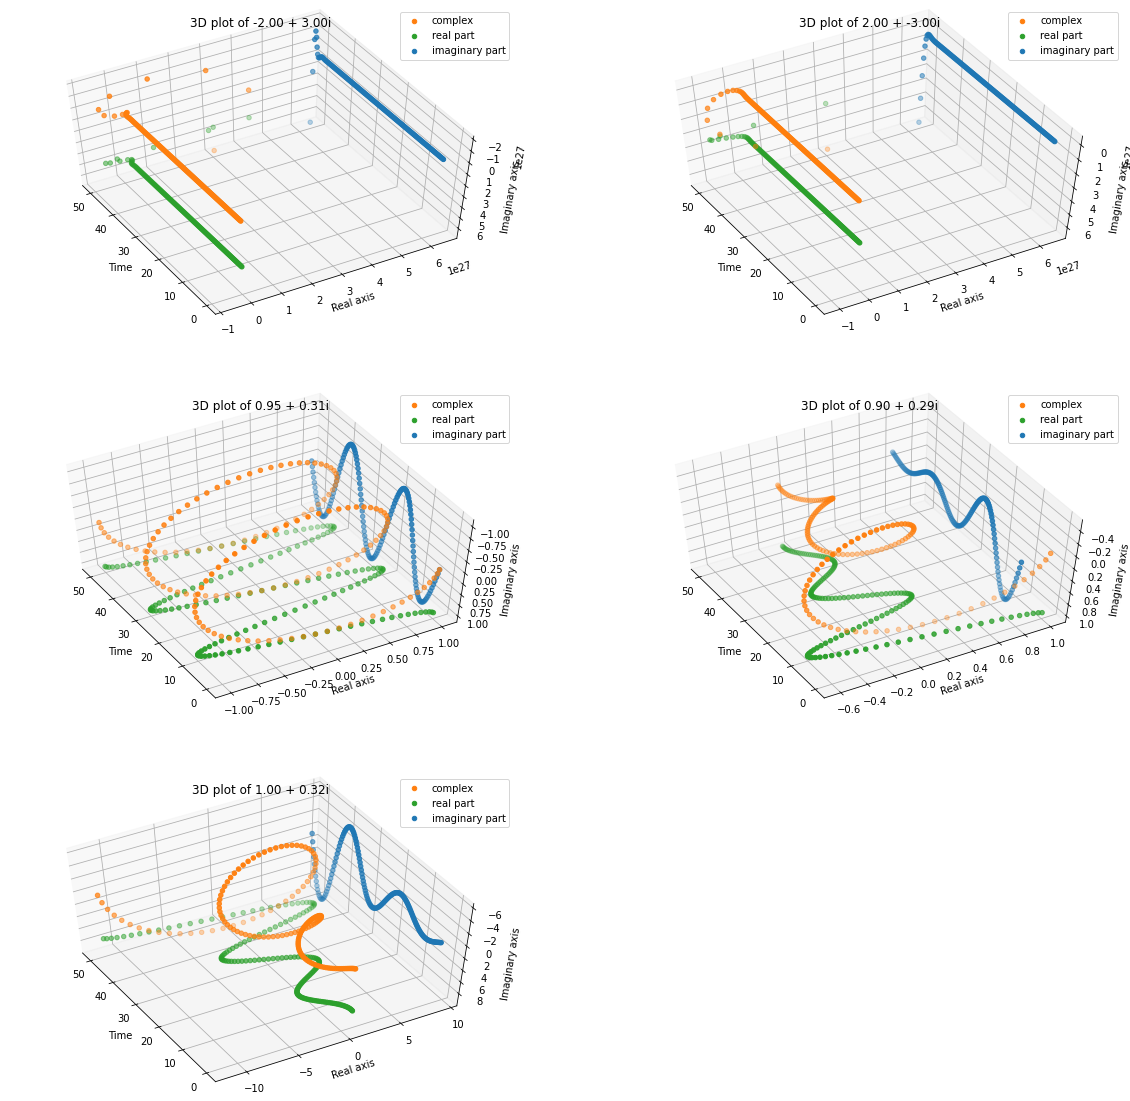

In [28]:
z = np.array([complex(-2,3),complex(2,-3),cmath.exp((pi/10)*1j),0.95*cmath.exp((pi/10)*1j),1.05*cmath.exp((pi/10)*1j)])
n = np.linspace(0,50,150)
fig = plt.figure(figsize=(20,20))
for i in range(5):
  c = z[i]**n
  zeros = np.array([0]*(len(n)))
  ones = np.array([1]*(len(n)))
  real = c.real
  imag = c.imag
  ax = fig.add_subplot(3, 2, i+1, projection='3d')
  ax.scatter3D(n,real,imag,color = 'tab:orange')
  ax.scatter3D(n,real,max(real)*ones,color = 'tab:green')
  ax.scatter3D(n,max(imag)*ones,imag,color = "tab:blue")
  ax.legend(['complex','real part','imaginary part'])
  ax.view_init(-125, 30)
  ax.set_xlabel('Time')
  ax.set_ylabel('Real axis')
  ax.set_zlabel("Imaginary axis")
  ax.set_title("3D plot of %0.2f + %0.2fi"%(z[i].real,z[i].imag))

### Q3. Consider the system y[n] = 2x[n − 3], the input to this system is the sequence z^n where z belong to the sequences in the previous section (all complex). Find the response of the system. Also find the corresponding eigen values of the response.


---



#### x1[n] = (-2+3j)^n = (3.6^n)*exp(j2.15n)
#### y1[n] = 2*(3.6^(n-3))*exp(j2.15(n-3))


---


#### x2[n] = (2-j3)^n = (3.6^n)*exp(-j0.98n)
#### y2[n] = 2*(3.6^(n-3))*exp(-j0.98(n-3))

---


#### x3[n] = (exp(j*pi/10))^n = exp(j*n*pi/10)
#### y3[n] = 2*exp(j*(n-3)*pi/10) 


---


#### x4[n] = (0.95^n)*exp(j*n*pi/10)
#### y4[n] = 2*0.95^(n-3)*exp(j*(n-3)*pi/10)



---



#### x5[n] = (1.05^n)*(exp(j*pi/10))^n
#### y5[n] = 2*1.05^(n-3)*exp(j*(n-3)*pi/10)


---


#### Corresponding eigen values -
#### H(z) = 2(z^-3)


---



### Q4. The eigen values of the response is the Z Transform of the impulse response. This is also known as the transfer function denoted by H(z). Compute the magnitude spectrum |H(z)| and the phase spectrum arg[H(z)] and plot them in separate plots. Plot for the previous section by considering complex z values from last part.

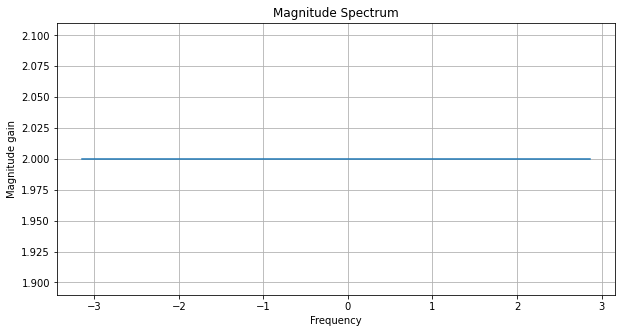

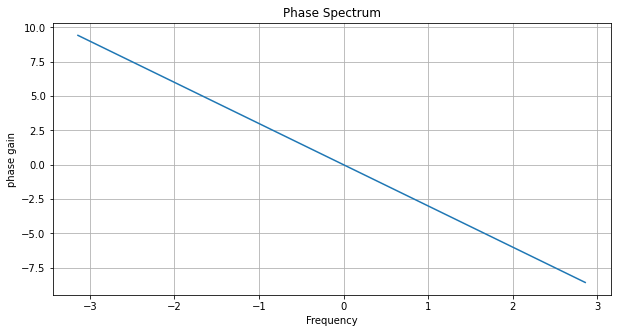

In [ ]:
omega = np.arange(-pi,pi)
mag_spect = np.array([2]*len(omega))
phase_spect = -3*omega
plt.figure(1,figsize=(10,5))
plt.grid()
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude gain")
plt.plot(omega,mag_spect)
plt.figure(2,figsize=(10,5))
plt.title("Phase Spectrum")
plt.xlabel("Frequency")
plt.ylabel("phase gain")
plt.plot(omega,phase_spect)
plt.grid()


#### Magnitude gain = 2 and phase gain = -3*w

1. For x1[n], magnitude gain = 2 and phase gain = -3*2.15 = -6.45
1. For x2[n], magnitude gain = 2 and phase gain = -3*(-0.98) = 2.94
1. For x3[n], magnitude gain = 2 and phase gain = -3*(pi/10) = -0.94
1. For x4[n], magnitude gain = 2 and phase gain = -3*(pi/10) = -0.94
1. For x5[n], magnitude gain = 2 and phase gain = -3*(pi/10) = -0.94

### Q5 Compute the Z Transform for the basic signals: δ[n], u[n], r[n], α^nu[n],nα^nu[n], r^n*cos(ω0n)u[n]. Choose specific values for each and visualize the magnitude and phase spectrums. Also plot the poles and zeros with the ROC. For which values if any the Z Transform does not exist? Try finding out the Z Transform outside the ROC.

#### 1. Z{del(n)} = 1, ROC: Entire z-plane


---


#### 2. Z{u[n]} = 1/(1-(z^-1)), ROC: |z| > 1


---


#### 3. Z{r[n]} = (z^-1)/((1-z^-1)^2), ROC: |z| > 1


---


#### 4. Z{(a^n)u[n]} = 1/(1-(az^-1)), ROC: |z| > |a|


---


#### 5. Z{n*(a^n)u[n]} = (az^-1)/(1-az^-1)^2, ROC: |z| > |a|


---


#### 6. Z{r^n*cos(ω0n)u[n]} = (1 - a*(z^-1)*cos(ω0))/(1 - 2*a*(z^-1)*cos(ω0) + (a^2)*(z^-2), ROC: |z| > |a|


---



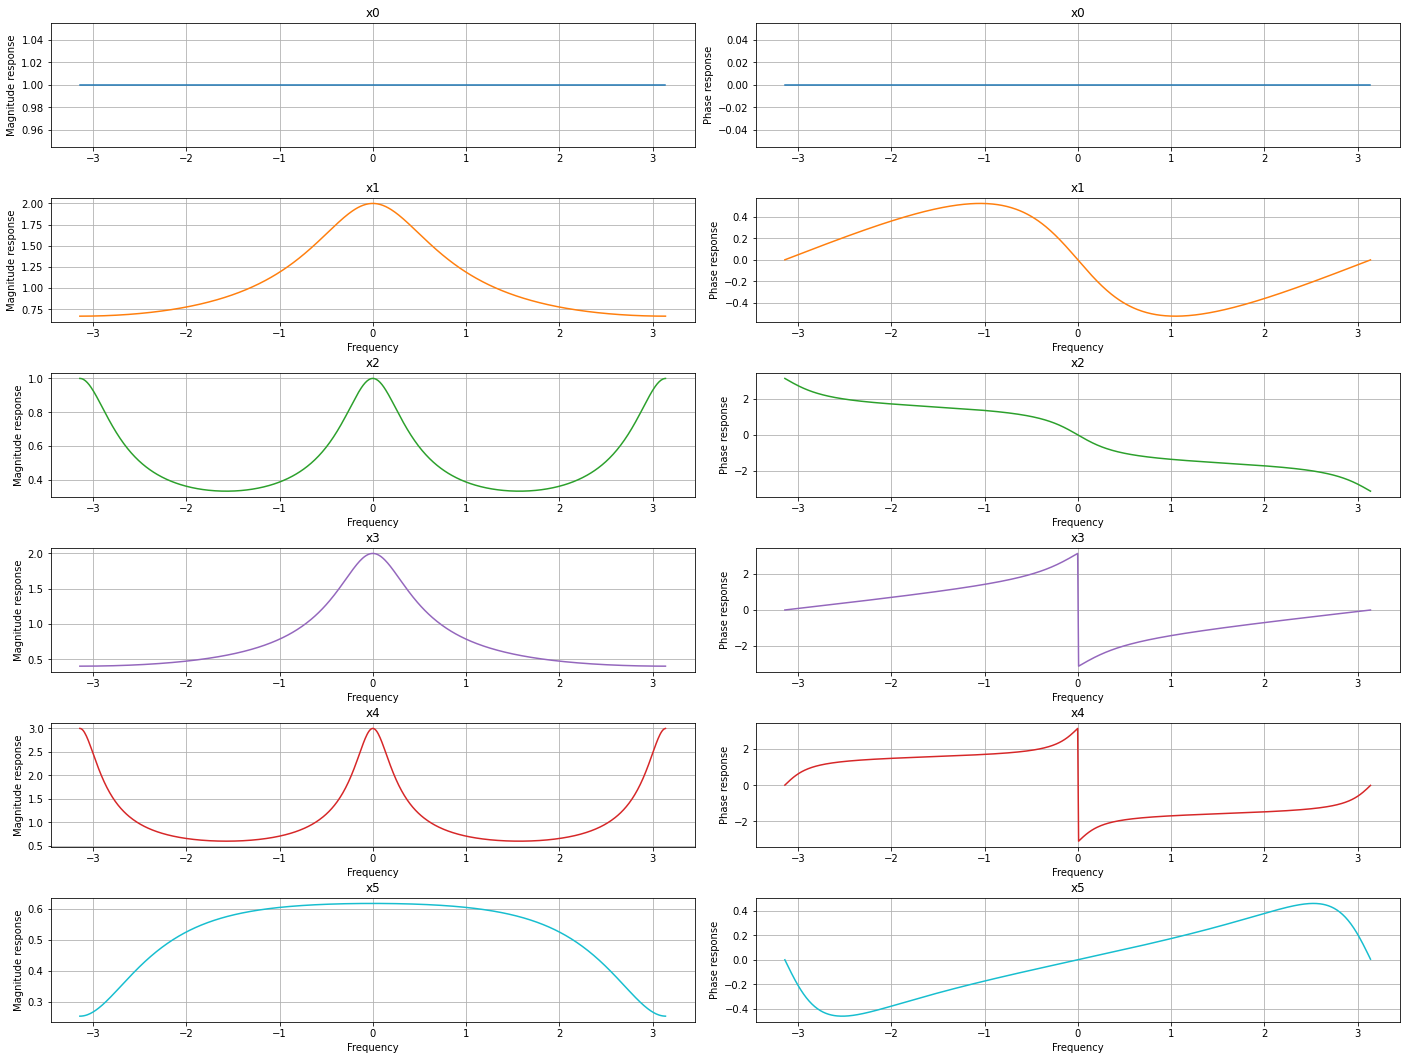

In [ ]:
# For visualising the magnitude and phase plots choosing all constants 'a' and 'ω0' in given signals as 3 and substituting 1/|z| = 0.5*e^(-j*w), since then |z| = 2
# that is we will have |z| > 1 

omega = np.arange(-pi,pi,0.01)
color = ['tab:orange','tab:green','tab:purple','tab:red','tab:cyan','tab:grey']
fig, axs = plt.subplots(6, 2,figsize=(20,15))
fig.tight_layout(pad=3.0)
x1 = 1
x2 = 1/(1-0.5*np.exp(omega*-1j))
x3 = (0.5*np.exp(omega*-1j))/(1-0.5*np.exp(omega*-1j)**2)
x4 = 1/(1-(3*0.5*np.exp(omega*-1j)))
x5 = (3*0.5*np.exp(omega*-1j))/(1-3*0.5*np.exp(omega*-1j)**2)
x6 =  (1 - 3*0.5*np.exp(omega*-1j)*np.cos(3))/(1 - 2*3*(0.5*np.exp(omega*-1j))*np.cos(3) + (3**(-2))*(0.5*np.exp(omega*-1j)**2))

#plotting x1
mag = np.array([1]*len(omega))
phase = np.array([0]*len(omega))
axs[0,0].plot(omega,mag)
axs[0,0].set_title("x0")
axs[0,0].grid()
axs[0,0].set_ylabel('Magnitude response')
axs[0,1].plot(omega,phase)
axs[0,1].set_title("x0")
axs[0,1].grid()
axs[0,1].set_ylabel('Phase response')

#plotting x2,x3,x4,x5,x6
lst = [x2,x3,x4,x5,x6]
for j in range(5):
  x = lst[j]
  lst_r = []
  lst_phi = []
  for i in range(len(omega)):
    r,phi = cmath.polar(x[i])
    lst_r.append(r)
    lst_phi.append(phi)
  axs[j+1,0].plot(omega,lst_r,color[j])
  axs[j+1,0].set_title("x%d"%(j+1))
  axs[j+1,0].grid()
  axs[j+1,0].set_xlabel('Frequency')
  axs[j+1,0].set_ylabel('Magnitude response')
  axs[j+1,1].plot(omega,lst_phi,color[j])
  axs[j+1,1].set_title("x%d"%(j+1))
  axs[j+1,1].grid()
  axs[j+1,1].set_xlabel('Frequency')
  axs[j+1,1].set_ylabel('Phase response')

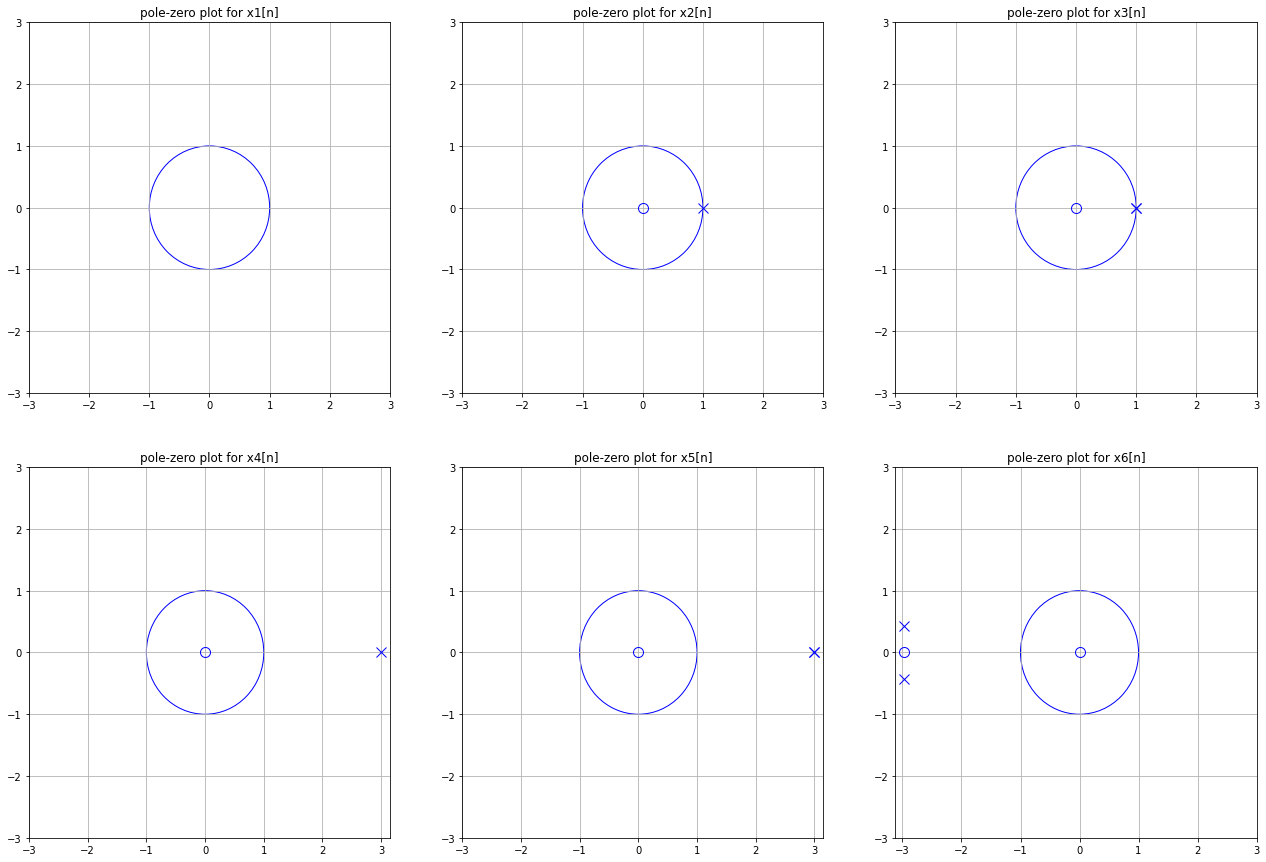

In [ ]:
num = np.array([[1], [1,0], [1,0], [1,0], [3,0], [1,-3*np.cos(3),0]])
den = np.array([[1], [1,-1],[1,-2,1], [1,-3], [1,-6,9], [1,-6*np.cos(3),9]])

fig, axs = plt.subplots(2,3,figsize=(22,15))
for i in range(6):
  p = np.roots(den[i])
  z = np.roots(num[i])
  plt.subplot(2,3,i+1) 
  for j in range(len(p)):
    plt.plot(p[j].real, p[j].imag, 'x', markersize=10, alpha=1,color="blue")
  for j in range(len(z)):
    plt.plot(z[j].real, z[j].imag,  'o', markersize=10, alpha=1,markeredgecolor='blue',color="none")
  plt.grid(True)
  plt.title("pole-zero plot for x%d[n]"%(i+1))
  ticks = [-3,-2,-1,0,1,2,3]
  plt.xticks(ticks)
  plt.yticks(ticks)
  ax = fig.gca()
  circle1 = plt.Circle((0, 0), 1, color='b',fill=False,lw=1)
  ax.add_patch(circle1)

## Part B: Discrete Time Fourier Series

### Q1. The DTFS coefficients of a periodic discrete time signal with period N = 5 are given below:
### a0 = 1, a2 = e^(j*pi/4), a4 = 2e^(j*pi/3)
### Using the properties of DTFS, determine the values of x[0] through x[4].

In [ ]:
a = np.array([1,0,np.exp(1j*(pi/4)),0,2*np.exp(1j*(pi/3))])
x = np.zeros(5)
n = np.arange(5)
for i in n:
  for k in range(len(a)):
    x[i] += a[k]*np.exp(1j*k*(pi/8)*i)
print("The values of x[0] through x[4] are-")
print(x)


The values of x[0] through x[4] are-
[ 2.70710678 -0.73205081 -0.70710678  1.73205081  1.29289322]


### Q2. Consider a periodic square wave with fundamental period N = 16 having magnitude 1 between n = 0 and n = 7 and zero elsewhere. Make a plot of this signal over two periods in blue colour. 

<StemContainer object of 3 artists>

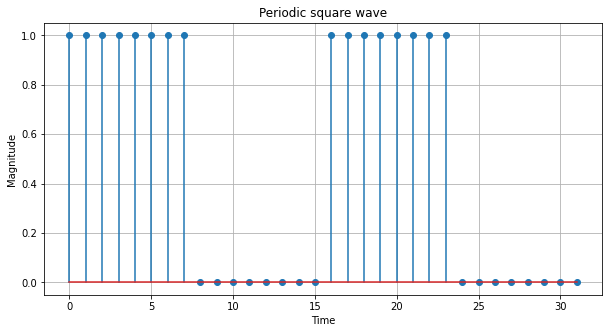

In [ ]:
plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Periodic square wave")
n = np.arange(0,32)
y = np.array([1]*8+[0]*8+[1]*8+[0]*8)
plt.stem(n,y)

### Q3. Determine the DTFS coefficients of this signal and generate magnitude plots of the coefficients.

DTFS coefficients of the signal are-

0.5, 0.32, 0.0, 0.11, 0.0, 0.08, 0.0, 0.06, 0.0, 0.06, 0.0, 0.08, 0.0, 0.11, 0.0, 0.32, 




<StemContainer object of 3 artists>

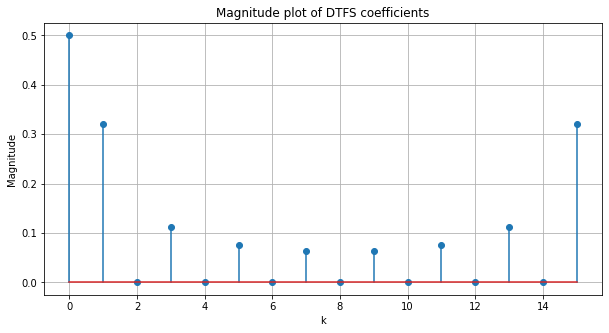

In [ ]:
plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel("k")
plt.ylabel("Magnitude")
plt.title("Magnitude plot of DTFS coefficients")
c = np.zeros(16)
n = np.arange(16)
c[0] = 0.5
print("DTFS coefficients of the signal are-\n")
print(c[0],end=", ")
for k in range(1,16):
  c[k] = 1/16*(sin(k*0.5*pi))/(sin(k*pi/16))
  print(abs(round(c[k],2)),end=", ")
print("\n\n")
plt.stem(n,abs(c))

### Q4. Using the coefficients determined above, make an approximate reconstruction of the square wave and display it on the plot of the original signal in red colour.


<StemContainer object of 3 artists>

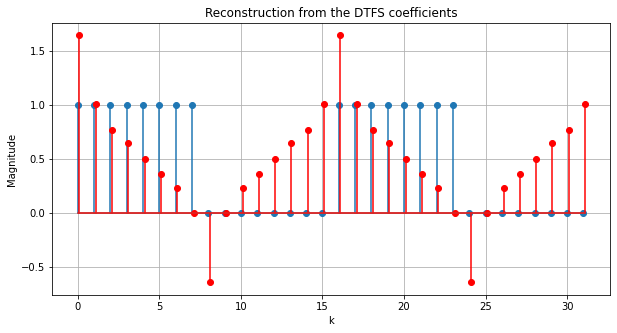

In [ ]:
n = np.arange(0,32)
a = [0.5, 0.32, 0.0, 0.11, 0.0, 0.08, 0.0, 0.06, 0.0, 0.06, 0.0, 0.08, 0.0, 0.11, 0.0, 0.32]
x = np.zeros(32)
for i in n:
  for k in range(len(a)):
    x[i] += a[k]*np.exp(1j*k*(pi/8)*i)
y = np.array([1]*8+[0]*8+[1]*8+[0]*8)
plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel("k")
plt.ylabel("Magnitude")
plt.title("Reconstruction from the DTFS coefficients")
plt.stem(n,y)
plt.stem(n+0.1,x,'r',markerfmt="ro")

# Part C: Continuous Time Fourier Transform

### Q1. Consider a rectangular signal with amplitude 5 and existing between t = −1 and t = 1. Compute the continuous time Fourier transform of this signal and display a nicely labelled plot.

### x(t) = 5 , -1 <t< 1; 0 otherwise
#### X(ω) = (10/ω)*sin(ω)

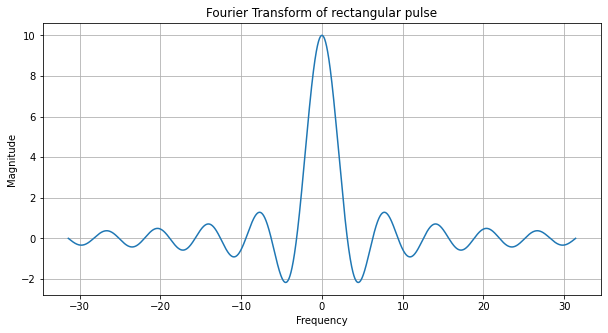

In [ ]:
omega = np.arange(-10*pi,10*pi,0.01)
plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of rectangular pulse")
plt.plot(omega,(10/omega)*np.sin(omega))

### Q2 A message signal m(t), a triangular signal existing between t = −1 and t = 1 with a peak amplitude of 1 is used to modulate a carrier signal c(t) = cos2πfct and the resultant signal is given by y(t) = m(t)c(t). Plot y(t)

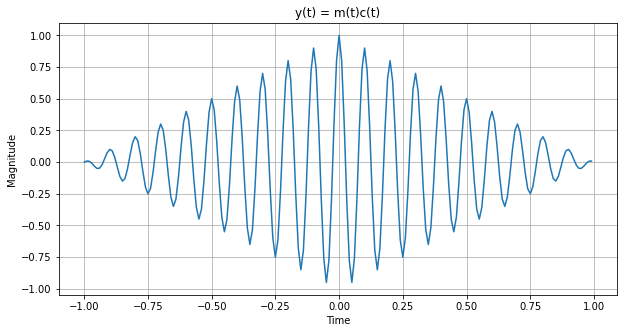

In [ ]:
t = np.arange(-1,1,0.01)
y1 = t[:100] + 1
y2 = -t[100:] + 1
plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("y(t) = m(t)c(t)")
y = np.concatenate([y1,y2])
c = np.cos(2*pi*10*t)
plt.plot(t,y*c)

### Q3. Compute the Fourier transform of m(t) and y(t) and display the plots.


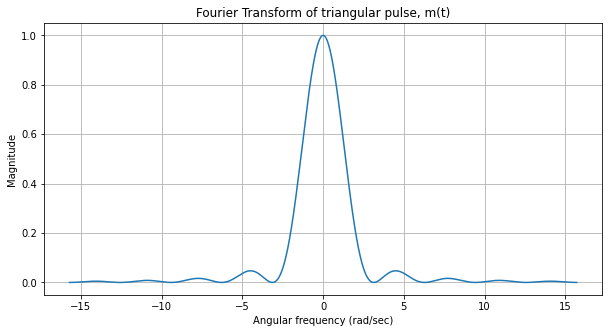

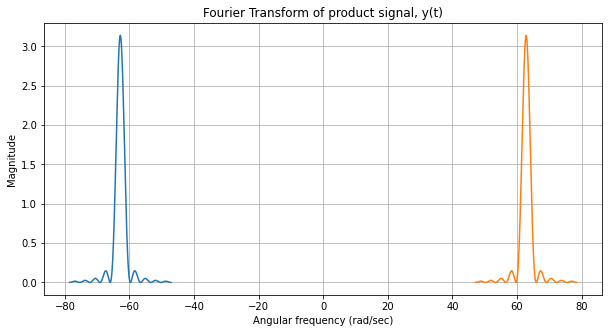

In [ ]:
# Fourier transform of the product m(t)*c(t) is (1/2pi).(M(w)*C(w)). Product in time domain changes to convolution in frequency domain.

omega = np.arange(-5*pi,5*pi,0.01)
plt.figure(1,figsize=(10,5))
plt.grid()
plt.xlabel("Angular frequency (rad/sec)")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of triangular pulse, m(t)")
plt.plot(omega,((1/omega)*np.sin(omega))**2)
plt.figure(2,figsize=(10,5))
plt.grid()
plt.xlabel("Angular frequency (rad/sec)")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of product signal, y(t)")
plt.plot(omega-2*pi*10,pi*((1/omega)*np.sin(omega))**2)
plt.plot(omega+2*pi*10,pi*((1/omega)*np.sin(omega))**2)
